# Netflix Data Analysis Project

## • Project Overview
This project analyzes the Netflix Movies and TV Shows dataset.
The goal is to clean the data, explore patterns, and extract insights.

## • Tools Used
- Python
- Pandas
- Matplotlib

## • Objectives
- Perform data cleaning
- Analyze content distribution
- Visualize trends over time
- Extract meaningful insights


---


### Libraries Used

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub


### Import Data

In [ ]:
path = kagglehub.dataset_download("ranaghulamnabi/netflix-movies-and-tv-shows-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\2B\.cache\kagglehub\datasets\ranaghulamnabi\netflix-movies-and-tv-shows-dataset\versions\1


In [255]:
df = pd.read_csv(r"C:\Users\2B\.cache\kagglehub\datasets\ranaghulamnabi\netflix-movies-and-tv-shows-dataset\versions\1\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Information About Data

In [256]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   str  
 1   type          8807 non-null   str  
 2   title         8807 non-null   str  
 3   director      6173 non-null   str  
 4   cast          7982 non-null   str  
 5   country       7976 non-null   str  
 6   date_added    8797 non-null   str  
 7   release_year  8807 non-null   int64
 8   rating        8803 non-null   str  
 9   duration      8804 non-null   str  
 10  listed_in     8807 non-null   str  
 11  description   8807 non-null   str  
dtypes: int64(1), str(11)
memory usage: 825.8 KB


## Data Cleaning

#### Remove a few rows that contain empty values.

In [257]:
df.dropna(subset= ['date_added','duration','rating'],inplace= True)
df.reset_index(drop=True)
print("done")

done


#### Fill the unknown values with 'unknown'.

In [258]:
df['director'] = df['director'].fillna("unknown")
df['cast'] = df['cast'].fillna("unknown")
df['country'] = df['country'].fillna("unknown")


In [259]:
# there is'nt NaN values
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Check for duplicates.

In [ ]:
# there isn't duplicated
print(df.duplicated().sum())  

0


#### Change the data type.

In [261]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])

## Feature Engineering

In [ ]:
df[['duration_int','duration_type']] = df['duration'].str.extract("(\d+)\s*(\w+)")
df['duration_int'] = df['duration_int'].astype('int')
df.drop(columns=['duration'],inplace=True)

## Data Analysis

In [263]:
# How many movies and TV programs?
ty = df['type'].value_counts()
ty

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [264]:
# Which year saw the most content uploaded?

years = df['date_added'].dt.year
y = years.value_counts().idxmax()

print("The year with the most content uploaded was :",y)

The year with the most content uploaded was : 2019


In [265]:
# What is the most popular genre?

x = df['listed_in'].str.split(', ', expand=True).stack().value_counts().idxmax()
print(f"Most popular genre was : '{x.replace(',',' and')}'")

Most popular genre was : 'International Movies'


In [266]:
# Which country is the largest producer?

z = df['country'].value_counts().idxmax()
print("The largest producing country is :",z)

The largest producing country is : United States


In [267]:
# What is the average duration of movies?

mean =  df[df['duration_type'] == "min"]['duration_int'].mean()

print("Average duration of movies is :",mean.round(1))

Average duration of movies is : 99.6


In [268]:
# what is the most frequent age rating 

a = df['rating'].value_counts().idxmax()
print("The most frequent age rating is :",a)


The most frequent age rating is : TV-MA


## Visualizations

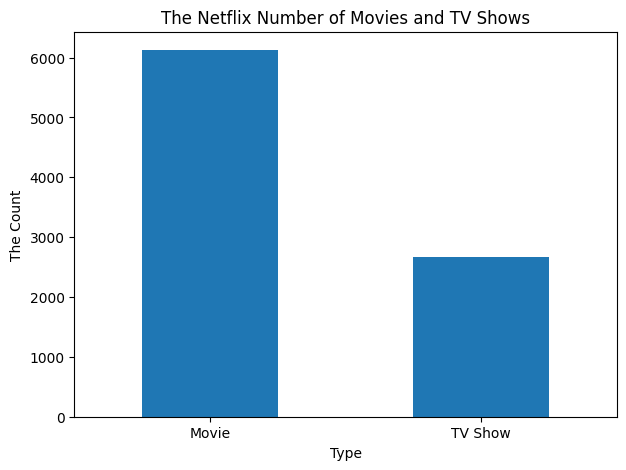

In [269]:

ty.plot(kind="bar",rot=360,figsize=(7,5))
plt.title("The Netflix Number of Movies and TV Shows")
plt.xlabel("Type")
plt.ylabel("The Count")
plt.show()

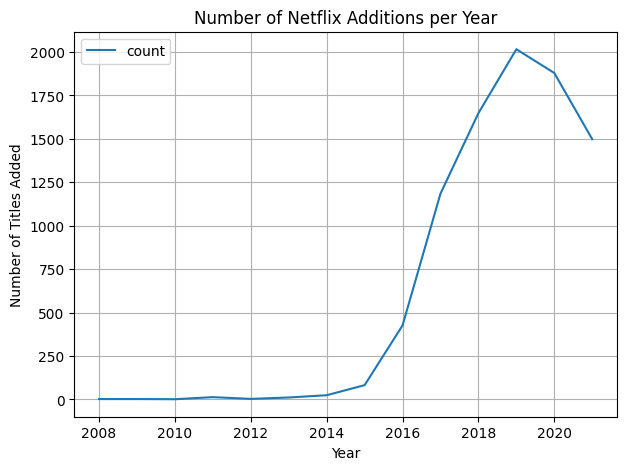

In [270]:
d = years.value_counts().sort_index()
d.to_frame().plot(kind ="line",figsize=(7,5))
plt.title('Number of Netflix Additions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

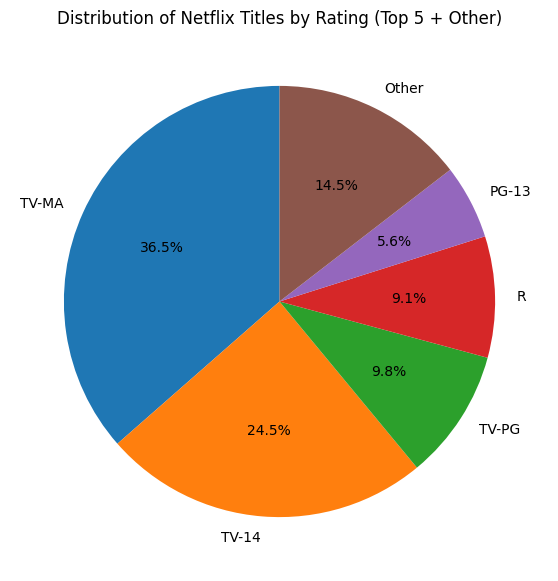

In [271]:
rating_counts = df['rating'].value_counts()

top5 = rating_counts.head(5)
other = rating_counts[5:].sum()

top5['Other'] = other

plt.figure(figsize=(7,7))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Netflix Titles by Rating (Top 5 + Other)')
plt.show()


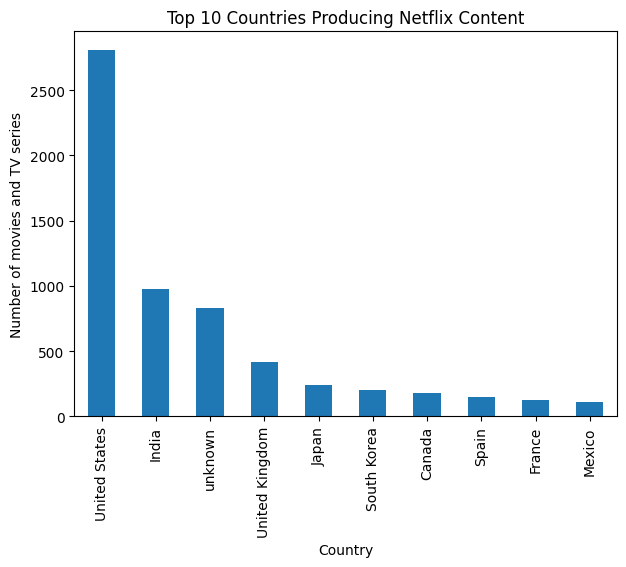

In [272]:
df['country'].value_counts().head(10).plot(kind="bar",figsize=(7,5))
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of movies and TV series')
plt.show()

## Executive Summary
The analysis shows that:
- The United States produces the highest amount of content on Netflix.
- The most common genre on the platform is International Movies.
- Movies are more common than TV Shows on the platform.
- Content additions peaked around 2019.
- TV-MA is the most frequent rating category.
- This suggests that Netflix content aligns with the standard global movie length (~100 minutes), which may reflect audience viewing preferences.


